# Bandit Problem

In [2]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [3]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [4]:
bandits[0].pullLever()

1.873023086409625

## Greedy algorithm Implementation

In [5]:
def run_greedy(bandits, steps=1000):
    """
    Run the greedy algorithm on the given bandits.

    Args:
        bandits (list): List of Bandit objects.
        steps (int): Number of steps to run the algorithm.

    Returns:
        list: Rewards obtained at each step.
    """
    num_bandits = len(bandits)
    
    # Initialize estimated rewards and counts
    estimated_rewards = [0] * num_bandits  # Initial reward estimates for each bandit
    counts = [0] * num_bandits  # Number of times each bandit is pulled
    
    rewards = []  # To store the rewards at each step

    for _ in range(steps):
        # Select the bandit with the highest estimated reward
        selected_bandit = estimated_rewards.index(max(estimated_rewards))
        
        # Pull the lever of the selected bandit
        reward = bandits[selected_bandit].pullLever()
        rewards.append(reward)
        
        # Update the count and estimated reward for the selected bandit
        counts[selected_bandit] += 1
        n = counts[selected_bandit]
        
        # Update the estimated reward using incremental formula
        estimated_rewards[selected_bandit] += (reward - estimated_rewards[selected_bandit]) / n

    return rewards


Plot the cumulative average of rewards as the number of iterations increases.

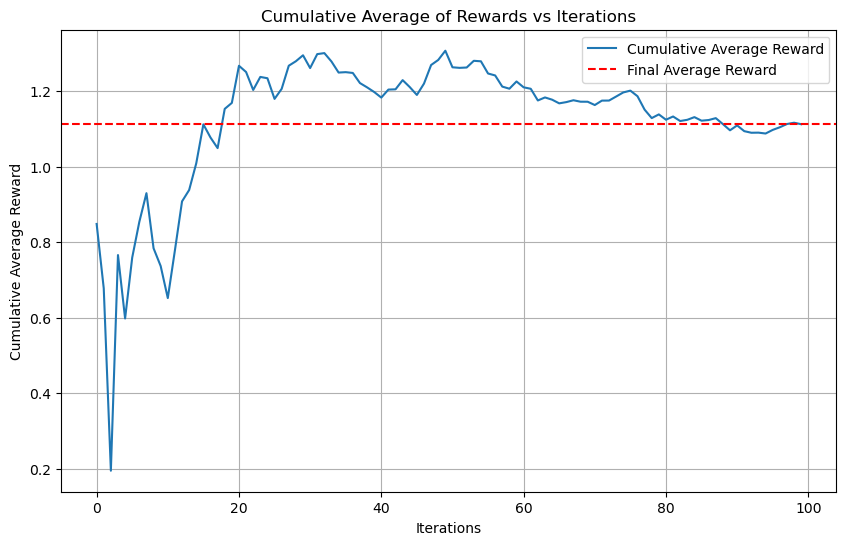

In [6]:
import matplotlib.pyplot as plt

def plot_cumulative_average(rewards):
    """
    Plot the cumulative average of rewards over iterations.

    Args:
        rewards (list): List of rewards obtained at each step.
    """
    # Calculate the cumulative sum and cumulative average
    cumulative_sum = [sum(rewards[:i+1]) for i in range(len(rewards))]
    cumulative_average = [cumulative_sum[i] / (i + 1) for i in range(len(rewards))]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_average, label="Cumulative Average Reward")
    plt.axhline(y=sum(rewards) / len(rewards), color="red", linestyle="--", label="Final Average Reward")
    plt.xlabel("Iterations")
    plt.ylabel("Cumulative Average Reward")
    plt.title("Cumulative Average of Rewards vs Iterations")
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage
bandits = [Bandit(mean=1), Bandit(mean=2), Bandit(mean=3)]
rewards = run_greedy(bandits, steps=100)
plot_cumulative_average(rewards)


## $\epsilon$-greedy Algorithm

In [8]:
import random

def run_epsilon_greedy(bandits, epsilon=0.1, steps=1000):
    """
    Run the epsilon-greedy algorithm on the given bandits.

    Args:
        bandits (list): List of Bandit objects.
        epsilon (float): Probability of exploring a random bandit (0 <= epsilon <= 1).
        steps (int): Number of steps to run the algorithm.

    Returns:
        list: Rewards obtained at each step.
    """
    num_bandits = len(bandits)
    
    # Initialize estimated rewards and counts
    estimated_rewards = [0] * num_bandits
    counts = [0] * num_bandits
    rewards = []  # To store the rewards at each step

    for _ in range(steps):
        # Select a bandit
        if random.random() < epsilon:
            # Explore: Choose a random bandit
            selected_bandit = random.randint(0, num_bandits - 1)
        else:
            # Exploit: Choose the bandit with the highest estimated reward
            selected_bandit = estimated_rewards.index(max(estimated_rewards))
        
        # Pull the lever of the selected bandit
        reward = bandits[selected_bandit].pullLever()
        rewards.append(reward)
        
        # Update the count and estimated reward for the selected bandit
        counts[selected_bandit] += 1
        n = counts[selected_bandit]
        estimated_rewards[selected_bandit] += (reward - estimated_rewards[selected_bandit]) / n

    return rewards


Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

In [9]:
import random

def run_epsilon_greedy(bandits, epsilon=0.1, steps=1000):
    """
    Run the epsilon-greedy algorithm on the given bandits.

    Args:
        bandits (list): List of Bandit objects.
        epsilon (float): Probability of exploring a random bandit (0 <= epsilon <= 1).
        steps (int): Number of steps to run the algorithm.

    Returns:
        list: Rewards obtained at each step.
    """
    num_bandits = len(bandits)
    
    # Initialize estimated rewards and counts
    estimated_rewards = [0] * num_bandits
    counts = [0] * num_bandits
    rewards = []  # To store the rewards at each step

    for _ in range(steps):
        # Select a bandit
        if random.random() < epsilon:
            # Explore: Choose a random bandit
            selected_bandit = random.randint(0, num_bandits - 1)
        else:
            # Exploit: Choose the bandit with the highest estimated reward
            selected_bandit = estimated_rewards.index(max(estimated_rewards))
        
        # Pull the lever of the selected bandit
        reward = bandits[selected_bandit].pullLever()
        rewards.append(reward)
        
        # Update the count and estimated reward for the selected bandit
        counts[selected_bandit] += 1
        n = counts[selected_bandit]
        estimated_rewards[selected_bandit] += (reward - estimated_rewards[selected_bandit]) / n

    return rewards


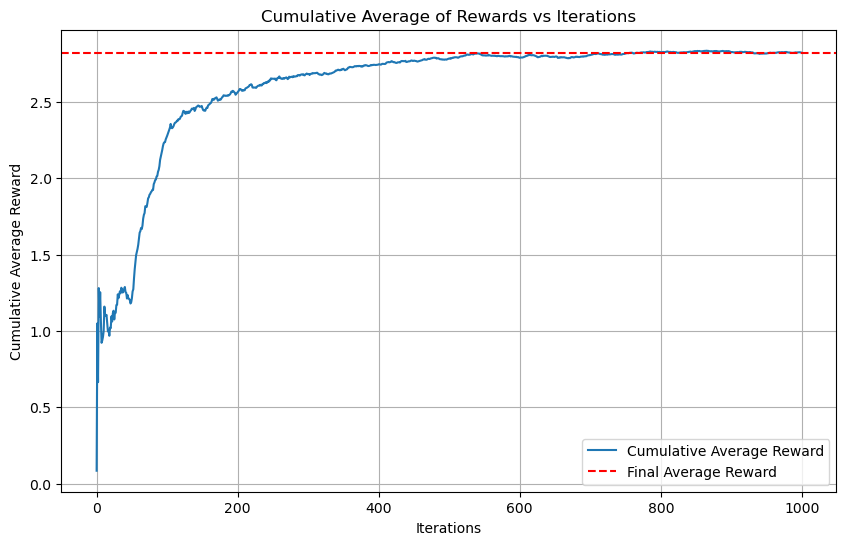

Total reward: 2823.506175721455


In [10]:
# Create bandits with different reward means
bandits = [Bandit(mean=1), Bandit(mean=2), Bandit(mean=3)]

# Run the epsilon-greedy algorithm
epsilon = 0.1  # 10% chance of exploration
rewards = run_epsilon_greedy(bandits, epsilon=epsilon, steps=1000)

# Plot the cumulative average of rewards
plot_cumulative_average(rewards)

# Print total reward
print(f"Total reward: {sum(rewards)}")


## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

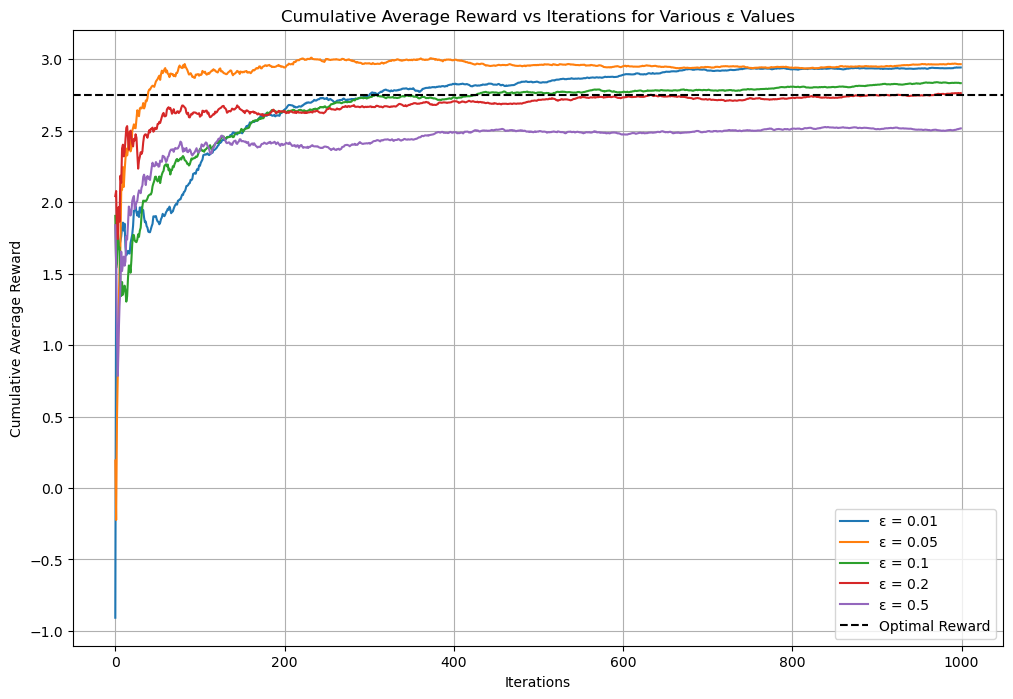

In [11]:
import matplotlib.pyplot as plt

# Assuming the Bandit and run_epsilon_greedy functions are already defined as per earlier discussions

def plot_optimal_epsilon(bandits, epsilon_values, steps=1000):
    """
    Run the epsilon-greedy algorithm for various epsilon values and plot the cumulative average of rewards.

    Args:
        bandits (list): List of Bandit objects.
        epsilon_values (list): List of epsilon values to evaluate.
        steps (int): Number of iterations for each run.
    """
    plt.figure(figsize=(12, 8))

    for epsilon in epsilon_values:
        # Run the epsilon-greedy algorithm for this epsilon value
        rewards = run_epsilon_greedy(bandits, epsilon=epsilon, steps=steps)
        
        # Calculate cumulative average
        cumulative_sum = [sum(rewards[:i+1]) for i in range(len(rewards))]
        cumulative_average = [cumulative_sum[i] / (i + 1) for i in range(len(rewards))]

        # Plot cumulative average
        plt.plot(cumulative_average, label=f"ε = {epsilon}")

    # Plot formatting
    plt.xlabel("Iterations")
    plt.ylabel("Cumulative Average Reward")
    plt.title("Cumulative Average Reward vs Iterations for Various ε Values")
    plt.axhline(y=max([b.pullLever() for b in bandits]), color="black", linestyle="--", label="Optimal Reward")
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage
bandits = [Bandit(mean=1), Bandit(mean=2), Bandit(mean=3)]  # Create 3 bandits with different means
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5]  # Different epsilon values to test
plot_optimal_epsilon(bandits, epsilon_values, steps=1000)


## Optimistic Initial Values

In [12]:
import random

def run_optimistic_greedy(bandits, steps=1000, initial_value=10):
    """
    Run the optimistic-greedy algorithm on the given bandits.

    Args:
        bandits (list): List of Bandit objects.
        steps (int): Number of steps to run the algorithm.
        initial_value (float): The optimistic initial value for each bandit.

    Returns:
        list: Rewards obtained at each step.
    """
    num_bandits = len(bandits)

    # Initialize the estimated rewards and counts with the optimistic initial value
    estimated_rewards = [initial_value] * num_bandits
    counts = [0] * num_bandits
    rewards = []  # To store the rewards at each step

    for _ in range(steps):
        # Select the bandit with the highest estimated reward (greedy selection)
        selected_bandit = estimated_rewards.index(max(estimated_rewards))

        # Pull the lever of the selected bandit
        reward = bandits[selected_bandit].pullLever()
        rewards.append(reward)

        # Update the count and estimated reward for the selected bandit
        counts[selected_bandit] += 1
        n = counts[selected_bandit]
        estimated_rewards[selected_bandit] += (reward - estimated_rewards[selected_bandit]) / n

    return rewards


Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

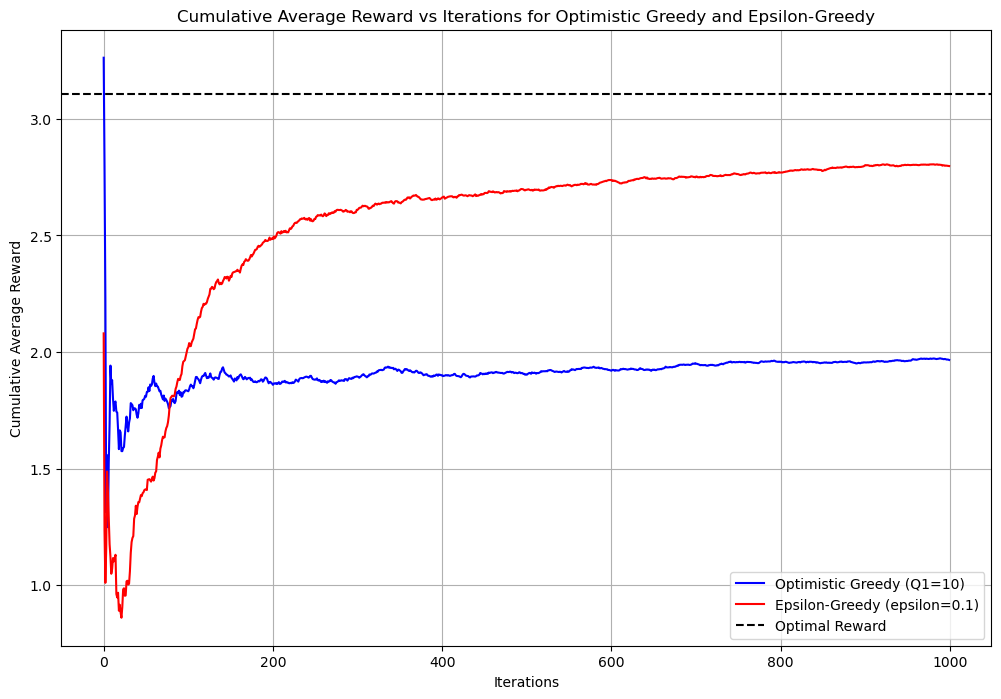

In [13]:
import matplotlib.pyplot as plt

# Assuming Bandit, run_optimistic_greedy, and run_epsilon_greedy functions are already defined

def plot_comparison():
    bandits = [Bandit(mean=1), Bandit(mean=2), Bandit(mean=3)]  # Create 3 bandits with different means
    
    # Run Optimistic Greedy with Q1=10
    optimistic_rewards = run_optimistic_greedy(bandits, steps=1000, initial_value=10)
    cumulative_sum_optimistic = [sum(optimistic_rewards[:i+1]) for i in range(len(optimistic_rewards))]
    cumulative_average_optimistic = [cumulative_sum_optimistic[i] / (i + 1) for i in range(len(optimistic_rewards))]
    
    # Run Epsilon-Greedy with epsilon=0.1
    epsilon_rewards = run_epsilon_greedy(bandits, epsilon=0.1, steps=1000)
    cumulative_sum_epsilon = [sum(epsilon_rewards[:i+1]) for i in range(len(epsilon_rewards))]
    cumulative_average_epsilon = [cumulative_sum_epsilon[i] / (i + 1) for i in range(len(epsilon_rewards))]
    
    # Plotting both algorithms' cumulative averages
    plt.figure(figsize=(12, 8))
    
    plt.plot(cumulative_average_optimistic, label="Optimistic Greedy (Q1=10)", color="blue")
    plt.plot(cumulative_average_epsilon, label="Epsilon-Greedy (epsilon=0.1)", color="red")
    
    # Plot formatting
    plt.xlabel("Iterations")
    plt.ylabel("Cumulative Average Reward")
    plt.title("Cumulative Average Reward vs Iterations for Optimistic Greedy and Epsilon-Greedy")
    plt.axhline(y=max([b.pullLever() for b in bandits]), color="black", linestyle="--", label="Optimal Reward")
    plt.legend()
    plt.grid()
    plt.show()

# Run the comparison plot
plot_comparison()


## Optional - Upper Confidence Bound (UCB)

In [14]:
import numpy as np

def run_ucb(c, bandits, steps=1000):
    """
    Run the Upper Confidence Bound (UCB) algorithm on the given bandits.
    
    Args:
        c (float): Exploration constant that controls exploration vs exploitation.
        bandits (list): List of Bandit objects.
        steps (int): Number of steps to run the algorithm.
    
    Returns:
        list: Rewards obtained at each step.
    """
    num_bandits = len(bandits)
    
    # Initialize the estimated rewards and counts
    estimated_rewards = [0] * num_bandits
    counts = [0] * num_bandits
    rewards = []  # To store the rewards at each step
    
    # Initialize each bandit by pulling once to avoid division by zero
    for i in range(num_bandits):
        reward = bandits[i].pullLever()
        rewards.append(reward)
        counts[i] += 1
        estimated_rewards[i] = reward
    
    # Now, continue for the remaining steps
    for step in range(num_bandits, steps):
        # Calculate the UCB for each bandit and select the one with the highest UCB
        ucb_values = [
            estimated_rewards[i] + c * np.sqrt((2 * np.log(step + 1)) / counts[i])
            for i in range(num_bandits)
        ]
        
        # Select the bandit with the highest UCB value
        selected_bandit = np.argmax(ucb_values)
        
        # Pull the lever of the selected bandit
        reward = bandits[selected_bandit].pullLever()
        rewards.append(reward)
        
        # Update the count and estimated reward for the selected bandit
        counts[selected_bandit] += 1
        n = counts[selected_bandit]
        estimated_rewards[selected_bandit] += (reward - estimated_rewards[selected_bandit]) / n
    
    return rewards


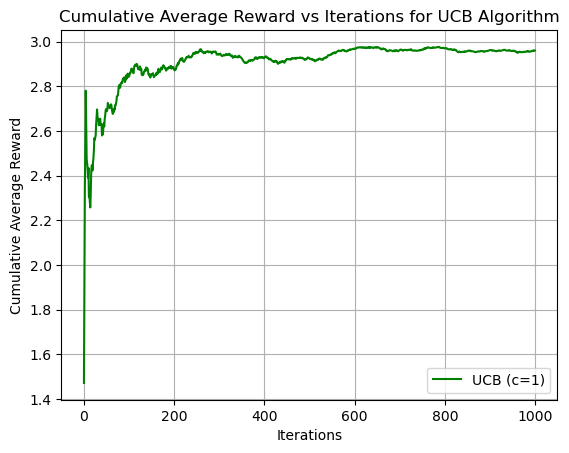

In [15]:
# Create bandits with different reward means
bandits = [Bandit(mean=1), Bandit(mean=2), Bandit(mean=3)]  # Create 3 bandits with different means

# Run UCB with c=1 (exploration constant)
ucb_rewards = run_ucb(c=1, bandits=bandits, steps=1000)

# Plot the cumulative average of rewards
cumulative_sum_ucb = [sum(ucb_rewards[:i+1]) for i in range(len(ucb_rewards))]
cumulative_average_ucb = [cumulative_sum_ucb[i] / (i + 1) for i in range(len(ucb_rewards))]

plt.plot(cumulative_average_ucb, label="UCB (c=1)", color="green")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("Cumulative Average Reward vs Iterations for UCB Algorithm")
plt.legend()
plt.grid()
plt.show()
